# **Análisis del uso de las energías en España y su relación con las energías renovables.**

### Trabajo por **Álvaro Mendoza González** y **Jesús Enrique Cartas Rascón**


---


En este análisis pretendemos entender qué energías se utlizan en España principalmente, cuánto y cómo. Intentaremos también arrojar luz en el tema de las energías renovables y su relación con las energías clásicas, para ver en qué medida merece la pena dar el salto. 

Todos los datos provienen del [**Eurostat**](https://ec.europa.eu/eurostat), una gran fuente de datos estadísticos a nivel europeo.




# <a name=ini>Tabla de contenidos</a>

> <a href=#intro>Introducción</a>

> <a href=#uso>Cómo y cuánto se usa cada tipo de energía</a>

> <a href=#access>Cómo de accesible es esta energía a los diferentes sectores</a>

> <a href=#contaminacion>Cuales son los niveles de contaminación producidos por cada tipo de energía</a>

> <a href=#evol>Cómo evoluciona el ritmo de uso de las energías renovables</a>

> <a href=#relacion>Conclusión</a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# <a name=intro href=#ini>1. Introducción</a>

---

Dedicaremos esta primera parte a importar las librerías y archivos necesarios para el análisis, así como a definir un conjunto de funciones que nos sirvan de ayuda y agilicen el proceso de desarrollo.

Las librerías principales son:
 - Pandas para el manejo de Dataframes, una estructura de datos esencial en esta disciplina
 - Numpy, para el proceso de los datos con rutinas muy optimizadas, cálculos y funciones muy útiles
 - Matplotlib, una librería basada en MatLab para la representación de los datos en gráficas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = "https://raw.githubusercontent.com/jesi-rgb/proyectoTGI/master/"

In [3]:
electricity_prices_household = pd.read_csv(base_url + "energy_data/electricity_prices_household.csv", delimiter=';')
gas_prices_household = pd.read_csv(base_url + "energy_data/gas_prices_household.csv", delimiter=';')
consum = pd.read_csv(base_url + 'energy_data/consumo_energias_sector.csv', delimiter=';')
energy_cons = pd.read_csv(base_url + "energy_data/consumo_todas_energias.csv", delimiter=';')

In [4]:
def consulta_por_valor_columna(dataframe, valor, nombre_columna):
    return dataframe[dataframe[nombre_columna] == valor]

In [5]:
def castear_a_float(input_list):
    '''Recibe una lista de valores y devuelve otra con los valores interpretados como flotantes.
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    ''' 
    return input_list.apply(float)

In [6]:
def string_replace_columna(columna, valor_a_buscar, valor_sustituto):
    '''Busca espacios en la columna y los elimina
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    '''
    return columna.str.replace(valor_a_buscar, valor_sustituto)

In [7]:
def eliminar_valores_invalidos(dataframe, columna, valor_invalido, valor_nuevo):
    '''Sustituye las instancias de valor_invalido por las de valor nuevo en la columna. Por ejemplo, para sustituir \':\' por -1
    Es recomendable pasar el valor nuevo como tipo igual al que tiene el data frame, para que luego los casteos no se hagan complicados
    '''
    dataframe.loc[dataframe[columna] == valor_invalido, columna] = valor_nuevo

In [8]:
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]) 
tableau20 = tableau20/255

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
def annot_max(x,y, ax=None, xPos=1, yPos=1):
    xmax = x[pd.Series.idxmax(y)]
    ymax = y.max()
    text = "Max: x={0:s}, y={1:.3f}".format(xmax, float(ymax))
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.5,rounding_size=0.2", fc="white", ec="black", lw=2)
    arrowprops = dict(arrowstyle= "-|>", connectionstyle="angle, angleA=0, angleB=60", lw=2, color='black')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", size=12)
    ax.annotate(text, xy=(xmax, ymax), xytext=(xPos, yPos), **kw)

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# <a name=uso href=#ini>2. Cómo y cuánto se usa cada tipo de energía</a>

---

En esta sección trataremos de hallar las proporciones de uso de las energías más importantes en España: la energía eléctrica, el consumo de gas.
Veremos cuál es el uso de la energía por sector y qué energías se usan más. En posteriores puntos, veremos para qué se usan.

<a>

<a>

<a>

<a>

<a>

<a>

In [11]:
consum_es = consulta_por_valor_columna(consum, 'ES', 'geo\\TIME_PERIOD')

In [12]:
consum_es

,freq,nrg_bal,siec,unit,geo\TIME_PERIOD,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
60,A,FC_E,TOTAL,KTOE,ES,91561.026,93937.419,90434.218,83936.267,85156.547,81957.200,78446.010,75859.230,74943.175,75960.969,78005.390,79397.426
61,A,FC_IND_E,TOTAL,KTOE,ES,24615.634,26627.198,25076.089,20693.264,20776.975,20602.546,20088.387,19587.584,19293.488,18205.959,18378.539,18973.788
62,A,FC_OTH_CP_E,TOTAL,KTOE,ES,8937.271,8828.268,9306.095,9414.431,9806.087,10197.481,10036.261,9595.893,8924.074,10268.907,10892.591,10412.985
63,A,FC_OTH_HH_E,TOTAL,KTOE,ES,15629.050,15672.903,15542.505,15967.814,16964.172,15662.135,15559.386,14918.154,14814.004,14998.213,15208.781,15435.162
64,A,FC_TRA_E,TOTAL,KTOE,ES,37870.440,38898.001,37022.456,34531.317,33877.104,32058.462,29298.283,28058.785,28223.339,29517.952,30643.218,31722.806


In [13]:
consum_es = consum_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [14]:
consum_es.Consumo = castear_a_float(consum_es.Consumo)

In [15]:
consum_es_sector = consum_es.groupby('nrg_bal', as_index=False).mean().sort_values('Consumo')

In [16]:
consum_es_sector.nrg_bal = consum_es_sector['nrg_bal'].replace({'FC_E': 'Total',
'FC_IND_E': 'Industry',
'FC_OTH_CP_E': 'Commercial and Public services',
'FC_OTH_HH_E': 'Household',
'FC_TRA_E': 'Transport'})

In [17]:
transporte = consum_es_sector.Consumo.iloc[3]
total = consum_es_sector.Consumo.iloc[0]

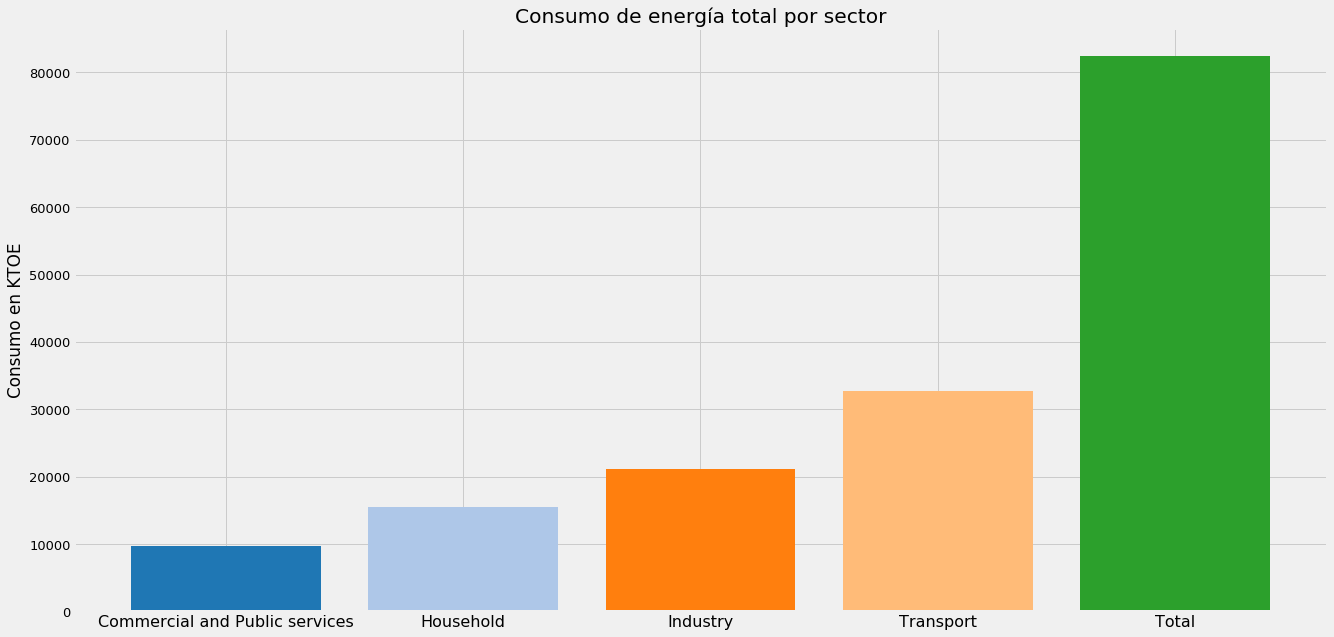

In [18]:
plt.figure(figsize=(20, 10))
plt.bar(consum_es_sector.nrg_bal.drop_duplicates(), consum_es_sector.Consumo, color=tableau20)
plt.title('Consumo de energía total por sector') 
plt.ylabel('Consumo en KTOE')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=13)

<a>

<a>

<a>

<a>

<a>

##### Consumo de energía eléctrica total #####

In [19]:
consum_elect = consulta_por_valor_columna(energy_cons, 'E7000', 'siec')
consum_elect_es = consulta_por_valor_columna(consum_elect, 'ES', 'geo\\TIME_PERIOD')

<a>

<a>

<a>

##### Consumo de gas #####

In [20]:
consum_gas = consulta_por_valor_columna(energy_cons, 'G3000', 'siec')
consum_gas_es = consulta_por_valor_columna(consum_gas, 'ES', 'geo\\TIME_PERIOD')

<a>

<a>

<a>

<a>

##### Consumo de energías renovables #####

In [21]:
consum_renovables = consulta_por_valor_columna(energy_cons, 'RA000', 'siec')
consum_renovables_es = consulta_por_valor_columna(consum_renovables, 'ES', 'geo\\TIME_PERIOD')

<a>

<a>

<a>

In [22]:
consum_elect_es = consum_elect_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

consum_gas_es = consum_gas_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

consum_renovables_es = consum_renovables_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [23]:
consum_elect_es.Consumo = castear_a_float(consum_elect_es.Consumo)
consum_gas_es.Consumo = castear_a_float(consum_gas_es.Consumo)
consum_renovables_es.Consumo = castear_a_float(consum_renovables_es.Consumo)

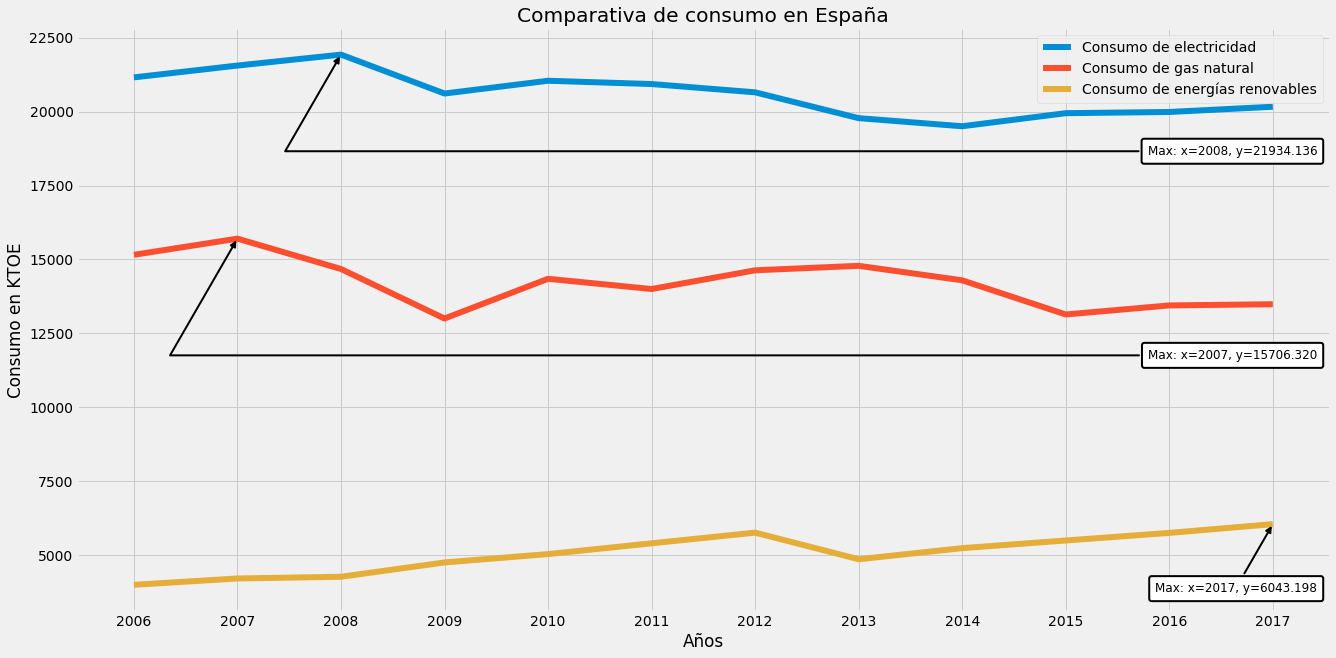

In [24]:
y_data = [consum_elect_es.Consumo,consum_gas_es.Consumo, consum_renovables_es.Consumo]

plt.figure(figsize=(20, 10))
for y in range(len(y_data)):
    plt.plot(consum_elect_es.Años, y_data[y], linewidth=6)
    
plt.title('Comparativa de consumo en España' )
plt.xlabel('Años' )
plt.ylabel('Consumo en KTOE' )
plt.legend(['Consumo de electricidad', 'Consumo de gas natural', 'Consumo de energías renovables'])

annot_max(consum_elect_es.Años, consum_elect_es.Consumo, xPos=0.99, yPos=0.8)
annot_max(consum_gas_es.Años, consum_gas_es.Consumo, xPos=0.99, yPos=0.45)
annot_max(consum_renovables_es.Años, consum_renovables_es.Consumo, xPos=0.99, yPos=0.05)

<a>

<a>

<a>

<a>

In [25]:
energy_cons_es = energy_cons[energy_cons['geo\\TIME_PERIOD'] == 'ES'].copy()

In [26]:
energy_cons_es = energy_cons_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [27]:
eliminar_valores_invalidos(energy_cons_es, 'Consumo', ': ', np.NaN)
eliminar_valores_invalidos(energy_cons_es, 'Consumo', ': z', np.NaN)

In [28]:
energy_cons_es.Consumo = castear_a_float(energy_cons_es.Consumo)

In [29]:
bar_height_cons = energy_cons_es.groupby('siec', as_index=False).mean()

In [30]:
bar_height_cons = bar_height_cons.sort_values('Consumo')

In [31]:
bar_height_cons.siec =  bar_height_cons['siec'].replace({'C0000X0350-0370': 'Solid fossil fuels',
'C0350-0370': 'Manufactured gases',
'P1000': 'Peat and peat products',
'S2000': 'Oil shale and oil sands',
'G3000': 'Natural gas',
'O4000XBIO': 'Oil and petroleum products',
'RA000': 'Renewables and biofuels',
'W6100_6220': 'Non-renewable waste',
'E7000': 'Electricity',
'H8000': 'Heat',
'N900H': 'Nuclear heat'})

In [32]:
bar_height_cons = bar_height_cons.drop(bar_height_cons[bar_height_cons['Consumo'] < 2].index)

<BarContainer object of 8 artists>

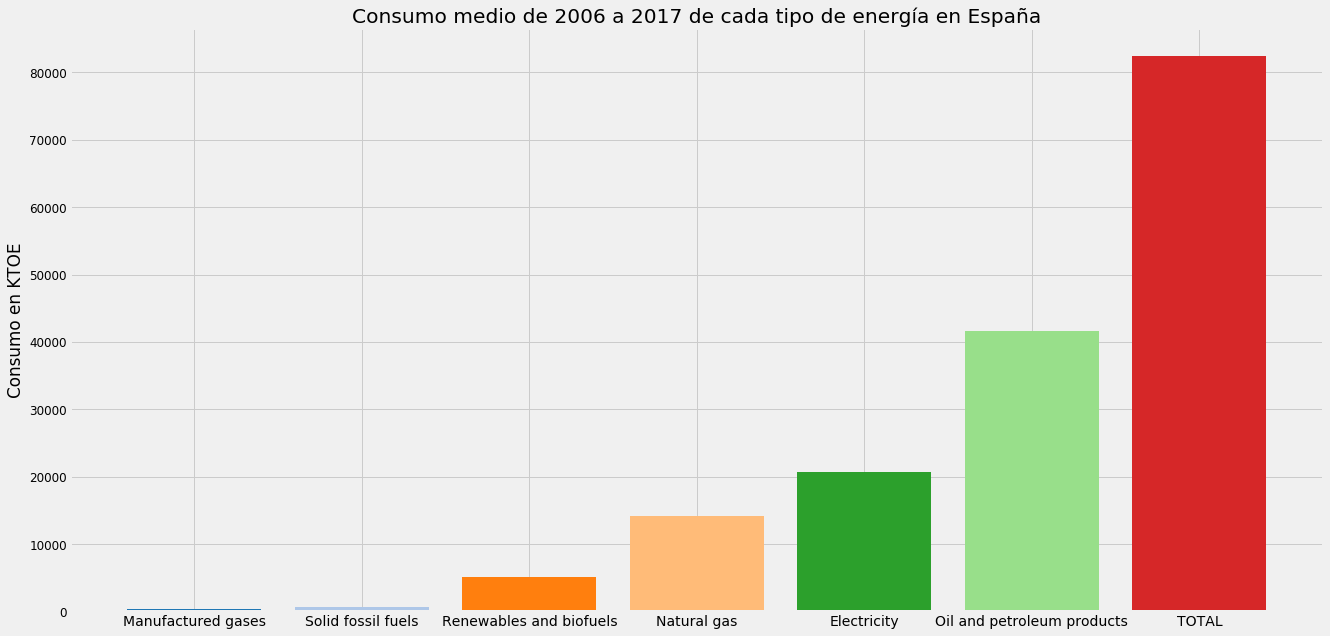

In [33]:
plt.figure(figsize=(20, 10))
plt.title('Consumo medio de 2006 a 2017 de cada tipo de energía en España' )
plt.ylabel('Consumo en KTOE' )
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=14)
plt.bar(bar_height_cons.siec.drop_duplicates(), height=bar_height_cons.Consumo, color=tableau20)

### De estas gráficas podemos concluir que:
- El sector que más consume es el de transporte, ocupando un 40% del total consumido y que el petróleo es la fuente de energía más utilizada, representando cerca de un 50% del total.
    - Esto puede deberse a la gran cantidad de recursos turísticos que ofrece España, así como al hecho de que no es un país particularmente industrial.
- El consumo de electricidad y de gas siguen líneas prácticamente idénticas en el tiempo, manteniendo un tendencia estable.
- Las energías renovables están empezando a consumirse cada vez más, aunque muy su crecimiento es bastante lento.

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# <a name=access href=#ini>3. Cómo de accesible es esta energía a los diferentes sectores</a>

---

#### En esta sección pretendemos arrojar luz acerca de cómo de accesible es la energía a los diferentes sectores. Por accesibilidad, en este contexto, nos referiremos exclusivamente al precio de la energía en diferentes condiciones (sector, tarifa, etc)

<a>

<a>

<a>

In [34]:
electricity_prices_household_es = consulta_por_valor_columna(electricity_prices_household, 'ES', 'geo\\time')
gas_prices_household_es = consulta_por_valor_columna(gas_prices_household, 'ES', 'geo\\time')

In [35]:
electricity_prices_household_es_eur = consulta_por_valor_columna(electricity_prices_household_es, 'EUR', 'currency')
electricity_prices_household_es_eur_xtax = consulta_por_valor_columna(electricity_prices_household_es_eur, 'X_TAX', 'tax')


gas_prices_household_es_eur = consulta_por_valor_columna(gas_prices_household_es, 'EUR', 'currency')
gas_prices_household_es_eur_xtax = consulta_por_valor_columna(gas_prices_household_es_eur, 'X_TAX', 'tax')

In [36]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

In [37]:
gas_prices_household_es_eur_xtax = gas_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

In [38]:
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": ", np.NaN)
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": u", np.NaN)

electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, 'p', "")
electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, " ", "")

In [39]:
electricity_prices_household_es_eur_xtax.Precio = castear_a_float(electricity_prices_household_es_eur_xtax.Precio)

In [40]:
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": ", np.NaN)
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": u", np.NaN)

gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, 'p', "")
gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, " ", "")

In [41]:
gas_prices_household_es_eur_xtax.Precio = castear_a_float(gas_prices_household_es_eur_xtax.Precio)

In [42]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax[electricity_prices_household_es_eur_xtax['Semestres'] != '2007S1']

In [43]:
less_1k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161901, 'consom')).Precio
from_1k_to_2k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161902, 'consom')).Precio
from_2k_to_5k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161903, 'consom')).Precio
from_5k_to_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161904, 'consom')).Precio
over_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161905, 'consom')).Precio

In [44]:
semestres_elec = (electricity_prices_household_es_eur_xtax.Semestres).drop_duplicates()

In [45]:
semestres_elec = semestres_elec.iloc[::-1]
less_1k = less_1k.iloc[::-1]
from_1k_to_2k = from_1k_to_2k.iloc[::-1] 
from_2k_to_5k = from_2k_to_5k.iloc[::-1] 
from_5k_to_15k = from_5k_to_15k.iloc[::-1]
over_15k = over_15k.iloc[::-1]

In [46]:
avg_elec = np.array([less_1k, from_1k_to_2k, from_2k_to_5k, from_5k_to_15k, over_15k])
avg_elec = np.mean(avg_elec, axis=0)
avg_elec = pd.Series(avg_elec)

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

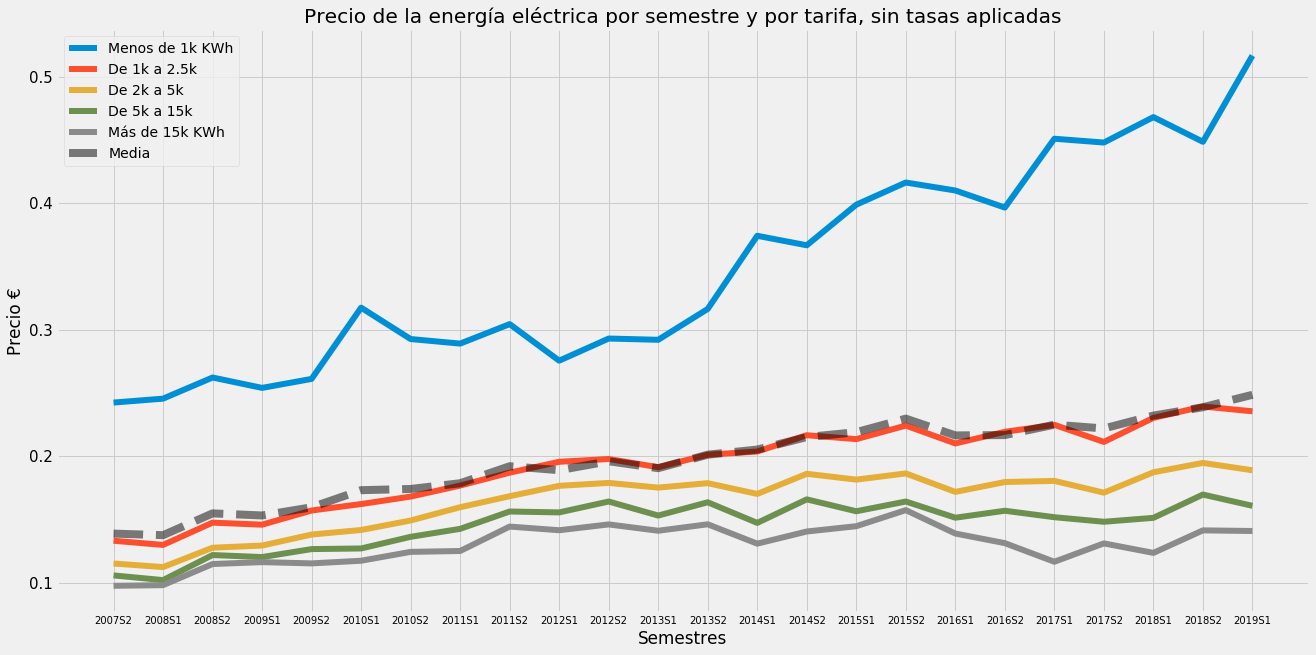

In [47]:
y_data = [less_1k, from_1k_to_2k, from_2k_to_5k, from_5k_to_15k, over_15k]

fig = plt.figure(figsize=(20, 10))

for y in range(len(y_data)):
    plt.plot(semestres_elec, y_data[y], linewidth=6)
del y_data

plt.plot(semestres_elec, avg_elec, 'k--', linewidth=8, alpha=0.5)

plt.title('Precio de la energía eléctrica por semestre y por tarifa, sin tasas aplicadas' )
plt.legend(['Menos de 1k KWh', 'De 1k a 2.5k', 'De 2k a 5k', 'De 5k a 15k', 'Más de 15k KWh', 'Media'])
plt.xlabel('Semestres' )
plt.ylabel('Precio €' )
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=10)

<a>

<a>

<a>

<a>

<a>

<a>

<a>

##### Preparamos los datos del gas #####

In [48]:
gas_prices_household_es_eur_xtax_gj = consulta_por_valor_columna(gas_prices_household_es_eur_xtax, 'GJ_GCV','unit')

In [49]:
gas_prices_household_es_eur_xtax_gj = gas_prices_household_es_eur_xtax_gj[(gas_prices_household_es_eur_xtax_gj['Semestres'] != '2019S1') & (gas_prices_household_es_eur_xtax_gj['Semestres'] != '2007S1')]

In [50]:
semestres_gas = (gas_prices_household_es_eur_xtax_gj.Semestres).drop_duplicates()

In [51]:
less_20GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141901, 'consom')).Precio
from_20GJ_to_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141902, 'consom')).Precio
over_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141903, 'consom')).Precio

In [52]:
less_20GJ = less_20GJ.iloc[::-1]
from_20GJ_to_200GJ = from_20GJ_to_200GJ.iloc[::-1]
over_200GJ = over_200GJ.iloc[::-1]
semestres_gas = semestres_gas.iloc[::-1]

In [53]:
averages = np.array([less_20GJ, from_20GJ_to_200GJ, over_200GJ])
averages = (np.mean(averages, axis=0))
averages = pd.Series(averages)

In [54]:
elec_prices_copy = electricity_prices_household_es_eur_xtax.copy()

In [55]:
elec_prices_copy.Semestres = elec_prices_copy.Semestres.str[:4]

In [56]:
elec_prices_anual = elec_prices_copy.groupby(['consom', 'Semestres'], as_index=False).mean()

In [57]:
elec_prices_anual_less_1k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161901, 'consom')
elec_prices_anual_1k_to_2k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161902, 'consom')
elec_prices_anual_2k_to_5k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161903, 'consom')
elec_prices_anual_5k_to_15k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161904, 'consom')
elec_prices_anual_over_15k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161905, 'consom')

In [58]:
avg_cons_elec = np.array([elec_prices_anual_less_1k.Precio, elec_prices_anual_1k_to_2k.Precio, elec_prices_anual_2k_to_5k.Precio, elec_prices_anual_2k_to_5k.Precio, elec_prices_anual_5k_to_15k.Precio, elec_prices_anual_over_15k.Precio])
avg_cons_elec = np.mean(avg_cons_elec, axis=0)
avg_cons_elec = pd.Series(avg_cons_elec)

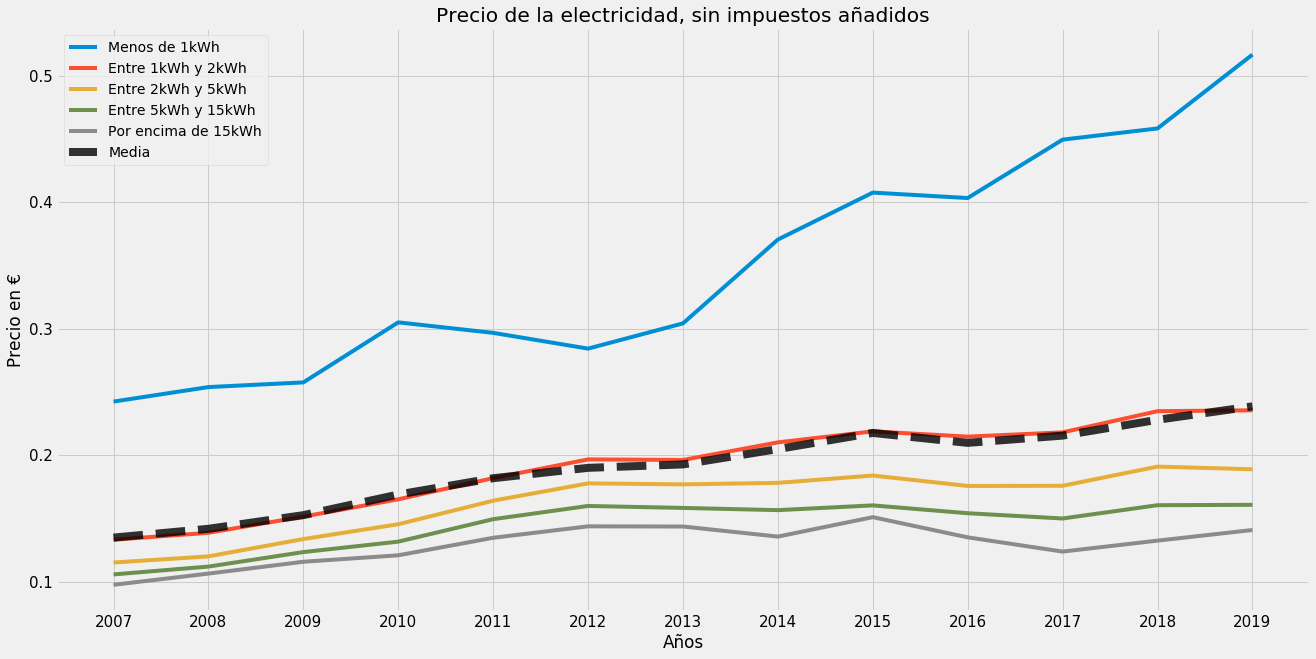

In [59]:
y_data = [elec_prices_anual_less_1k.Precio,
elec_prices_anual_1k_to_2k.Precio,
elec_prices_anual_2k_to_5k.Precio,
elec_prices_anual_5k_to_15k.Precio,
elec_prices_anual_over_15k.Precio,]

plt.figure(figsize=(20,10))
for y in range(len(y_data)):
    plt.plot(elec_prices_anual_less_1k.Semestres, y_data[y], linewidth=4)
del y_data

plt.plot(elec_prices_anual_less_1k.Semestres, avg_cons_elec, 'k--', linewidth=8, alpha=0.8)

plt.legend(['Menos de 1kWh', 'Entre 1kWh y 2kWh', 'Entre 2kWh y 5kWh', 'Entre 5kWh y 15kWh', 'Por encima de 15kWh', 'Media'])
plt.title('Precio de la electricidad, sin impuestos añadidos')
plt.ylabel('Precio en €')
plt.xlabel('Años')
plt.tick_params(axis='both', labelsize=15)

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

In [60]:
gas_prices_copy = gas_prices_household_es_eur_xtax.copy()

In [61]:
gas_prices_copy.Semestres = gas_prices_copy.Semestres.str[:4]

In [62]:
gas_prices_anual = gas_prices_copy.groupby(['consom', 'Semestres'], as_index=False).mean()

In [63]:
gas_prices_anual_less_20gj = consulta_por_valor_columna(gas_prices_anual.copy(), 4141901, 'consom')
gas_prices_anual_20gj_to_200gl = consulta_por_valor_columna(gas_prices_anual.copy(), 4141902, 'consom')
gas_prices_anual_over_200gl = consulta_por_valor_columna(gas_prices_anual.copy(), 4141903, 'consom')

In [64]:
avg_cons_gas = np.array([gas_prices_anual_less_20gj.Precio, gas_prices_anual_20gj_to_200gl.Precio, gas_prices_anual_over_200gl.Precio, gas_prices_anual_over_200gl.Precio])
avg_cons_gas = np.mean(avg_cons_gas, axis=0)
avg_cons_gas = pd.Series(avg_cons_gas)

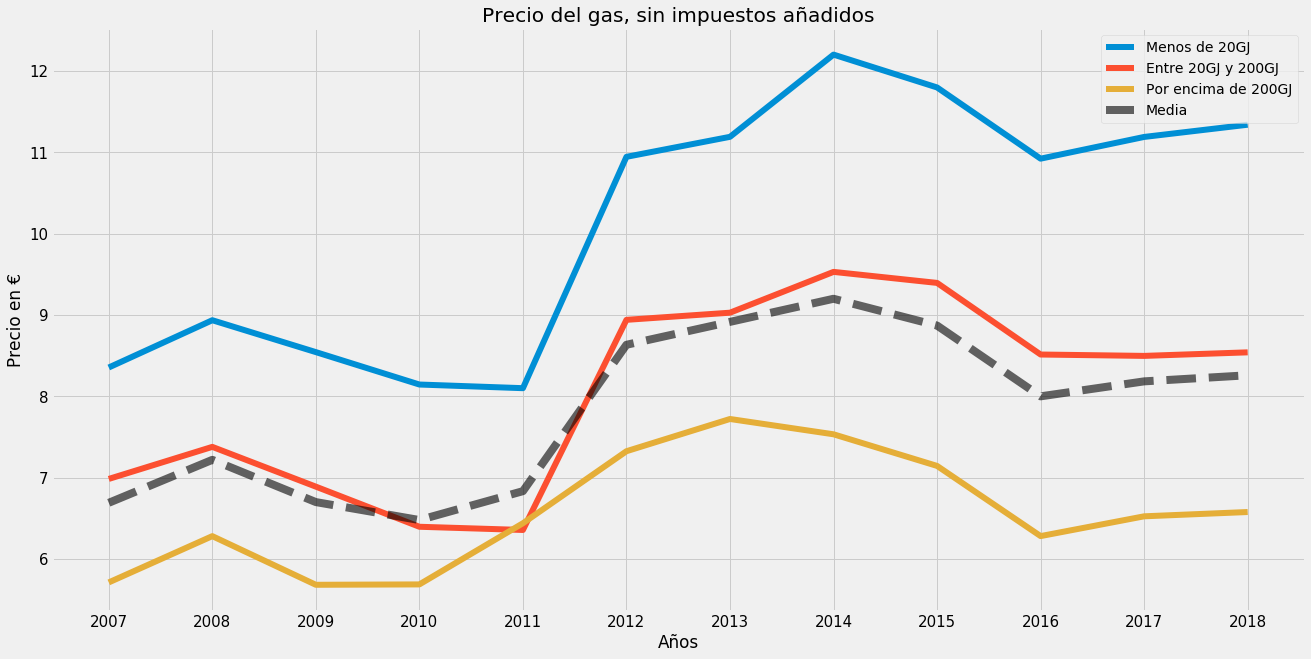

In [65]:
y_data = [gas_prices_anual_less_20gj.Precio, gas_prices_anual_20gj_to_200gl.Precio, gas_prices_anual_over_200gl.Precio]

plt.figure(figsize=(20,10))
for y in range(len(y_data)):
    plt.plot(gas_prices_anual_less_20gj.Semestres, y_data[y], linewidth=6)
del y_data

plt.plot(gas_prices_anual_less_20gj.Semestres, avg_cons_gas, '--k', linewidth = 8, alpha=0.6)

plt.legend(['Menos de 20GJ', 'Entre 20GJ y 200GJ', 'Por encima de 200GJ', 'Media'])
plt.title('Precio del gas, sin impuestos añadidos' )
plt.ylabel('Precio en €' )
plt.xlabel('Años' )
plt.tick_params(axis='both', labelsize=15)

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

In [66]:
consum_es_hh = consum_es[consum_es.nrg_bal == 'FC_OTH_HH_E']

Text(0.5, 1.0, 'Comparativa de precios de gas (arriba) y electricidad sin impuestos junto al consumo total de energías')

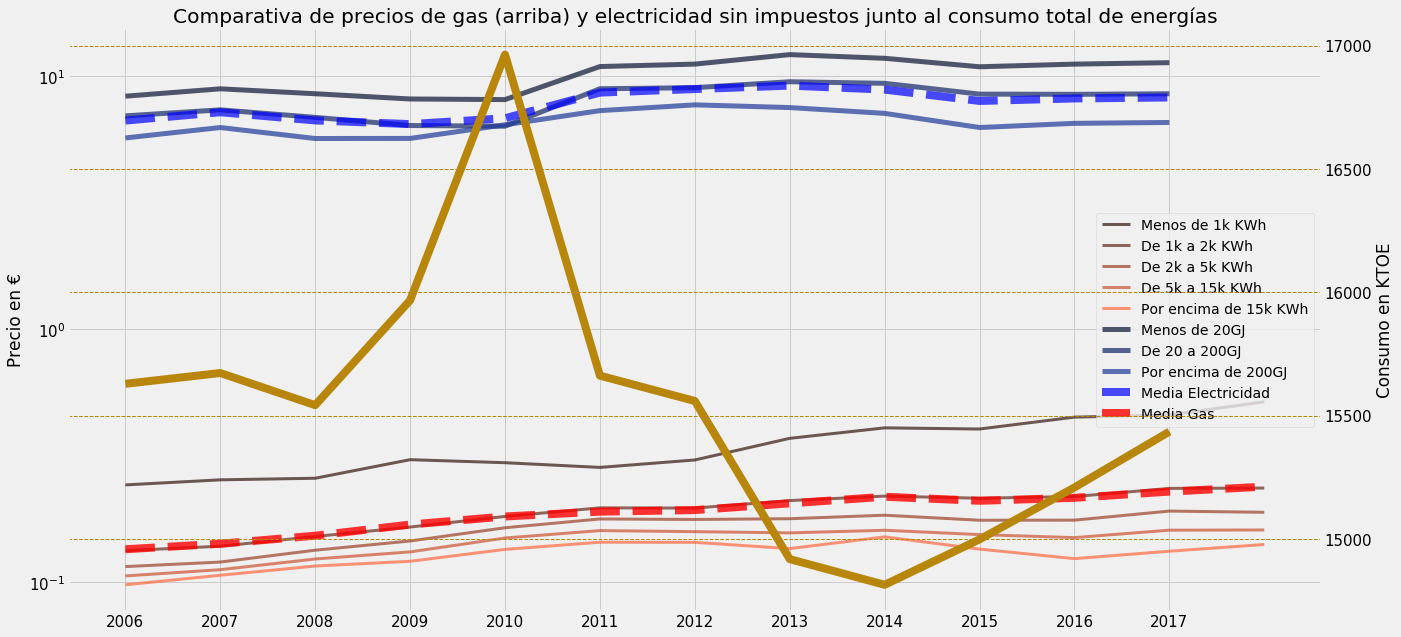

In [67]:
y_elec_data = [elec_prices_anual_less_1k.Precio,
          elec_prices_anual_1k_to_2k.Precio, 
          elec_prices_anual_2k_to_5k.Precio, 
          elec_prices_anual_5k_to_15k.Precio, 
          elec_prices_anual_over_15k.Precio]
y_gas_data = [gas_prices_anual_less_20gj.Precio,
          gas_prices_anual_20gj_to_200gl.Precio,
          gas_prices_anual_over_200gl.Precio]

plt.figure(figsize=(20,10))
plt.yscale("log")

r = 1
g = 105/255 
b = 64/255
i=0.2
for y in range(len(y_elec_data)):
    plt.plot(gas_prices_anual_less_20gj.Semestres, y_elec_data[y], color=(r * i, g * i, b * i, 0.7), linewidth=3)
    i += 0.2
    
    
i=0.2
r = 50/255
g = 94/255 
b = 1
for y in range(len(y_gas_data)):
    plt.plot(gas_prices_anual_less_20gj.Semestres, y_gas_data[y], color=(r * i, g * i, b * i, 0.7), linewidth=5)
    i += 0.2

del y_elec_data
    
plt.plot(gas_prices_anual_less_20gj.Semestres, avg_cons_gas, 'b--', linewidth = 8, alpha=0.7)
plt.plot(elec_prices_anual_less_1k.Semestres, avg_cons_elec, 'r--', linewidth = 8, alpha=0.8)


plt.tick_params(axis='both', labelsize=15)
plt.ylabel('Precio en €' )
plt.legend(['Menos de 1k KWh', 'De 1k a 2k KWh', 'De 2k a 5k KWh', 'De 5k a 15k KWh', 'Por encima de 15k KWh',
            'Menos de 20GJ', 'De 20 a 200GJ', 'Por encima de 200GJ', 'Media Electricidad', 'Media Gas', 'Consumo Medio'], loc='center right')


ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Consumo en KTOE')
ax2.grid(linestyle='--', color='darkgoldenrod')
ax2.plot(consum_es_hh.Años, consum_es_hh.Consumo, linewidth=8, color='darkgoldenrod')
ax2.tick_params(axis='y', labelsize=15)

plt.title("Comparativa de precios de gas (arriba) y electricidad sin impuestos junto al consumo total de energías" )

<a>

<a>

<a>

<a>

<a>

##### Comparativa de subida de precios #####

In [68]:
print("Precio en 2008 / Precio en 2019: {:.2f}".format(less_20GJ.iloc[-1] / less_20GJ.iloc[0]))

Precio en 2008 / Precio en 2019: 1.55


In [69]:
print("Precio en 2008 / Precio en 2019: {:.2f}".format(less_1k.iloc[-1] / less_1k.iloc[0]))

Precio en 2008 / Precio en 2019: 2.13


### En cuanto a la accesibilidad para los hogares de los diferentes recursos energéticos:
- Las tarifas de ambas, electricidad y gas, son más caras en sus variantes de menor potencia.
    - Esto puede deberse a que cuanto más compras de un producto, más barato te sale por cada unidad del mismo.
- Los precios han sufrido un crecimiento muy paulatino a lo largo de los años hasta ahora.
    - Sí es remarcable que la tarifa de menos de 1KWh de electricidad ha doblado su precio desde 2008, y la tarifa de menos de 20GJ del gas ha aumentado en un 50% en el mismo periodo.
- No hay una relación apreciable entre el consumo de energía en los hogares y el precio que tienen asociado.

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# <a name=contaminacion href=#ini>4. Cuáles son los niveles de contaminación producidos por cada tipo de energía</a>

---

#### En esta sección analizaremos cuáles son las fuentes de energía que más consumen y exactamente cómo consumen; es decir, qué gases emiten, en qé proporción, y dar una perspectiva temporal para ver si se mejora el rendimiento de las mismas

<a>

<a>

<a>

In [70]:
energy_pollution = pd.read_csv('energy_data/energy_pollution_sector_gas.csv', delimiter=';')

In [71]:
energy_pollution_es = consulta_por_valor_columna(energy_pollution.copy(), 'Spain', 'GEO')

In [72]:
eliminar_valores_invalidos(energy_pollution_es, 'Value', ':', np.NaN)
eliminar_valores_invalidos(energy_pollution_es, 'Value', ': z', np.NaN)
eliminar_valores_invalidos(energy_pollution_es, 'Value', ': u', np.NaN)

In [73]:
energy_pollution_es.Value = energy_pollution_es.Value.str.replace(' ', '')

In [74]:
energy_pollution_es.Value = castear_a_float(energy_pollution_es.Value)

<a>

<a>

<a>

### Los únicos gases que nos interesan de esta completa tabla son los referentes al dióxido de carbono y al metano, así que tomaremos solo esos datos:

In [75]:
energy_pollution_es = energy_pollution_es[(energy_pollution_es['AIRPOL'] == 'Carbon dioxide') | 
                                          (energy_pollution_es['AIRPOL'] == 'Methane')]

In [76]:
years = energy_pollution_es.TIME.drop_duplicates()

In [77]:
sectors = energy_pollution_es.SRC_CRF.drop_duplicates()

In [78]:
arr_sectores_co2 = []
arr_sectores_ch4 = []
for sector in sectors: 
    arr_sectores_co2.append(consulta_por_valor_columna(consulta_por_valor_columna(energy_pollution_es, sector, 'SRC_CRF'), 'Carbon dioxide', 'AIRPOL'))
    arr_sectores_ch4.append(consulta_por_valor_columna(consulta_por_valor_columna(energy_pollution_es, sector, 'SRC_CRF'), 'Methane', 'AIRPOL'))

<a>

<a>

<a>

<a>

### Vamos a reproducir los resultados. A la hora de tomar los valores, cogeremos solo a partir del sexto dataframe, ya que los anteriores nos aportan información poco específica. Quitaremos también el del final, que no aporta nada de información, ya que es una línea de 0.

Text(0.5, 1.0, 'Producción de metano por sectores')

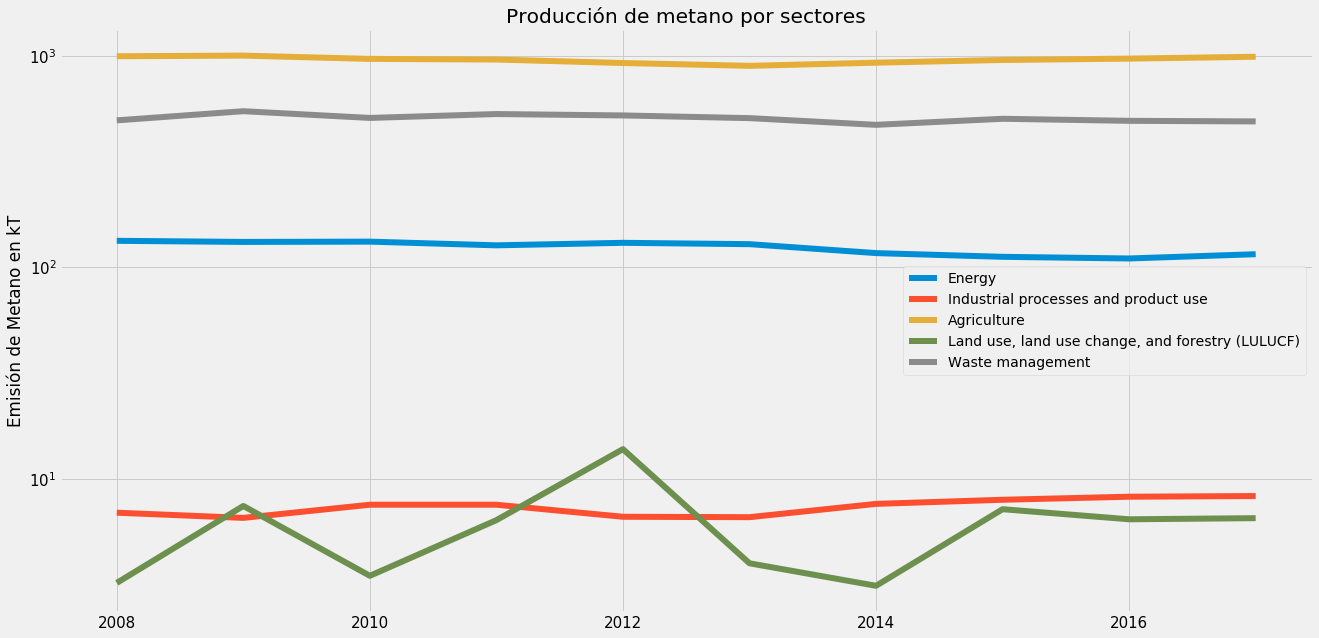

In [79]:
plt.figure(figsize=(20,10))
for df in arr_sectores_ch4[6:-1]:
    plt.plot(df.TIME, df.Value, label=df.SRC_CRF.iloc[0], linewidth=6)

plt.legend()
plt.yscale('log')
plt.tick_params(axis='both', labelsize=15)
plt.ylabel('Emisión de Metano en kT' )
plt.title('Producción de metano por sectores' )

Text(0.5, 1.0, 'Producción de CO2 por sectores')

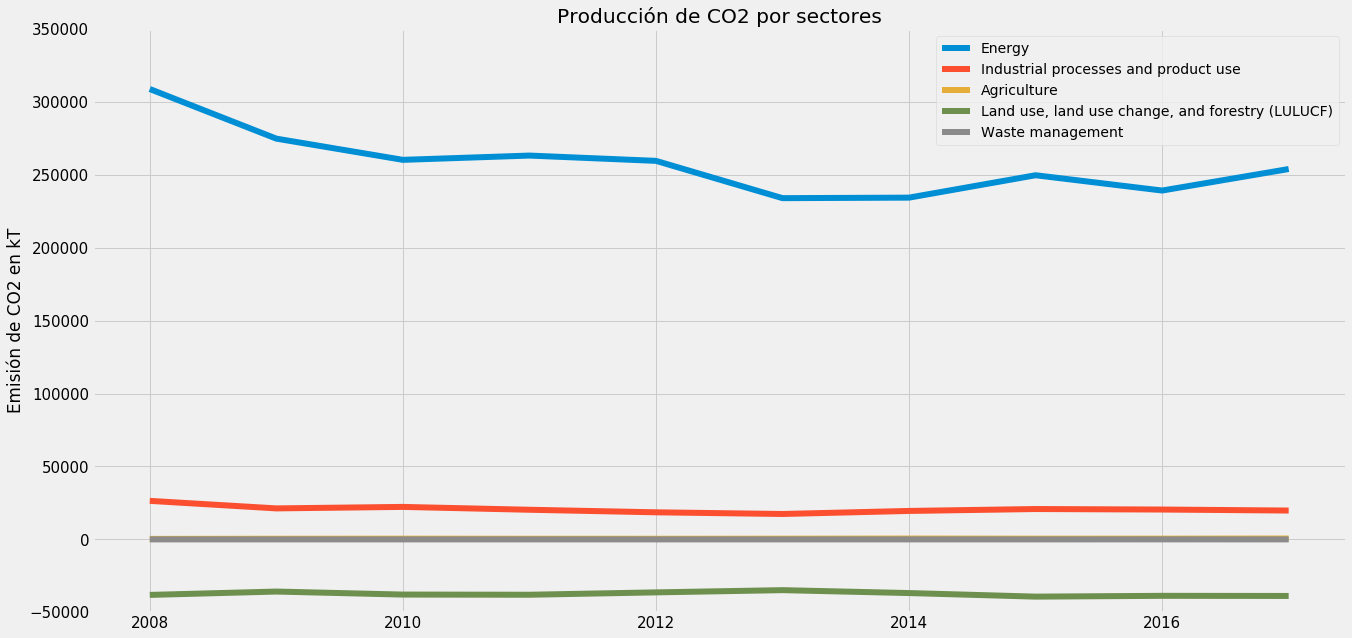

In [80]:
plt.figure(figsize=(20,10))
for df in arr_sectores_co2[6:-1]:
    plt.plot(df.TIME, df.Value, label=df.SRC_CRF.iloc[0], linewidth=6)

plt.legend()

plt.ylim(-50_000, 350_000)
plt.tick_params(axis='both', labelsize=15)
plt.ylabel('Emisión de CO2 en kT')
plt.title('Producción de CO2 por sectores')

### De estas gráficas, y con el conocimiento obtenido en los puntos anteriores, podemos inferir varias cosas:
- La producción de energía es el tercer sector que más contribuye a la producción de metano, con valores alrededor de las 150 kilo toneladas cada año.
    - Sin embargo ésto es solo un poco más de la décima parte del sector que más contribuye: agricultura.
- La producción de energía es, con diferencia, la que mas dióxido de carbono emite, estando alrededor de las 250.000 kilo toneladas estos últimos 10 años.
    - Esto puede deberse ya que, como hemos visto, la fuente de energía que más consume España son los petróleos, que generan mucho CO2 en su procesamiento.
    - Sí es cierto que se ha reducido con respecto a 2008.

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# <a name=evol href=#ini>5. Cómo evoluciona el ritmo de uso de las energías renovables</a>

---

#### El punto original de este trabajo era tratar de analizar cómo las energías renovables funcionan en el contexto de las energías clásicas más utilizadas. Ya hemos ofrecido una buena perspectiva acerca de cómo éstas funcionan, que nos da paso a indagar en las energías renovables, su uso y su evolución.

In [81]:
share_renewable = pd.read_csv(base_url + "/energy_data/share_renewable.csv", delimiter=',')

In [82]:
share_renewable.Value = castear_a_float(share_renewable.Value)

In [83]:
countries = share_renewable.GEO.drop_duplicates()

In [84]:
arr_countries_renew = []
for c in countries:
    arr_countries_renew.append(consulta_por_valor_columna(share_renewable, c, 'GEO'))

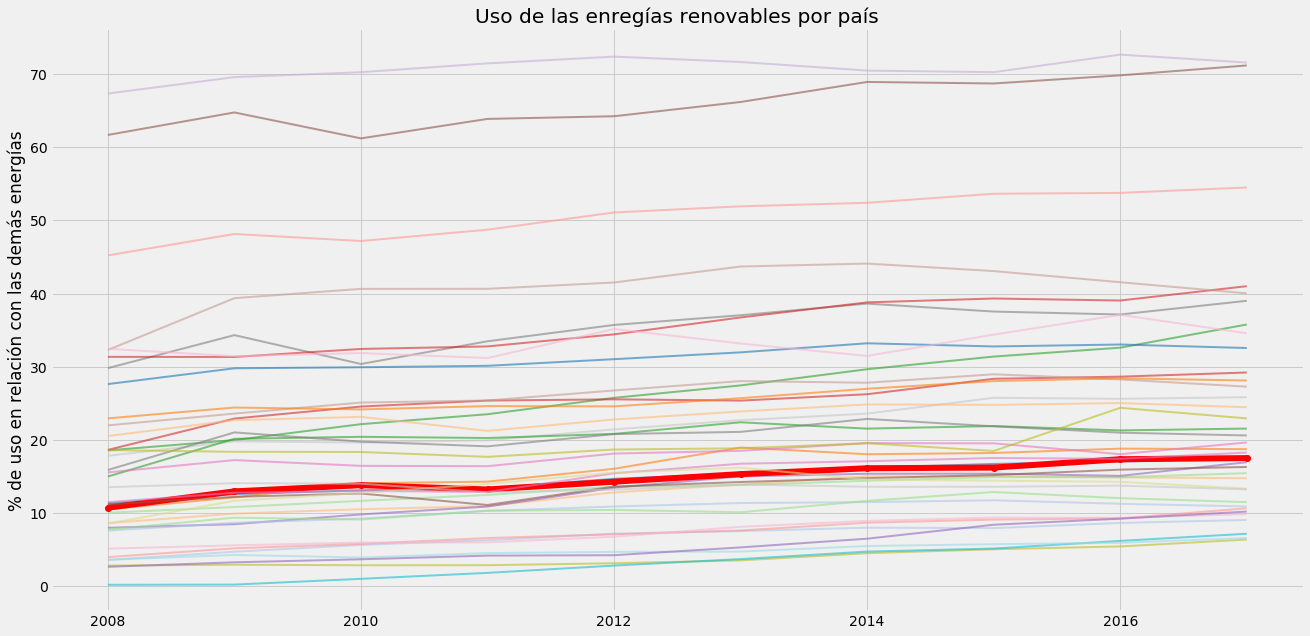

In [85]:
plt.figure(figsize=(20, 10))
plt.title('Uso de las enregías renovables por país')
plt.ylabel('% de uso en relación con las demás energías')
i=0
for df in arr_countries_renew:
    if(df.GEO.all() == 'Spain'):
        plt.plot(df.TIME, df.Value, label=df.GEO, color='red', linewidth=6, marker='o')
    else:
        plt.plot(df.TIME, df.Value, label=df.GEO, color=tableau20[i], linewidth=2, alpha=0.6)
    
    i = (i + 1)%len(tableau20)

In [86]:
renew_2010 = consulta_por_valor_columna(share_renewable.copy(), 2010, 'TIME')

renew_2017 = consulta_por_valor_columna(share_renewable.copy(), 2017, 'TIME')

In [87]:
renew_2010.GEO = renew_2010.GEO.replace({'Germany (until 1990 former territory of the FRG)':'Germany',
                   'Kosovo (under United Nations Security Council Resolution 1244/99)':'Kosovo',
                  'European Union - 28 countries': 'UE 28'})

renew_2017.GEO = renew_2017.GEO.replace({'Germany (until 1990 former territory of the FRG)':'Germany',
                   'Kosovo (under United Nations Security Council Resolution 1244/99)':'Kosovo',
                  'European Union - 28 countries': 'UE 28'})

In [88]:
renew_2010 = renew_2010.sort_values('Value')

renew_2017 = renew_2017.sort_values('Value')

Text(0.5, 0, '% de uso')

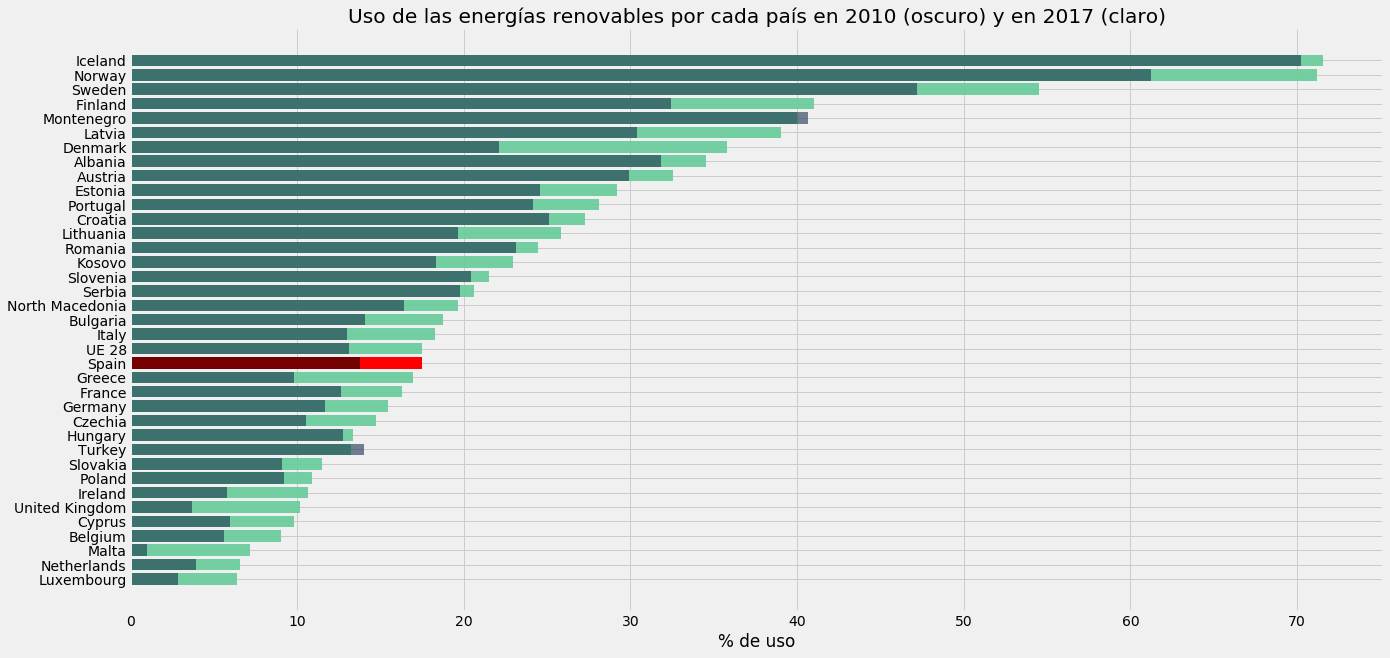

In [89]:
ax = plt.figure(figsize=(20, 10)).add_subplot(111)
plt.barh(y=renew_2017.GEO, width=renew_2017.Value, color=[(1, 0, 0, 1) if row == 'Spain' else (.4, .8, .6, .9) for row in renew_2017.GEO])
plt.barh(y=renew_2010.GEO, width=renew_2010.Value, color=[(.4, 0, 0, .9) if row == 'Spain' else (.1, .2, .3, .6) for row in renew_2010.GEO])
plt.title('Uso de las energías renovables por cada país en 2010 (oscuro) y en 2017 (claro)')
plt.xlabel('% de uso')


### Con estas dos gráficas tenemos una buena perspectiva de los datos:
 - Desde 2010, el uso de las energías renovables ha aumentado en todos los países de Europa, a excepción de 2 casos puntuales.
 - España está situada justo por debajo de la media en cuanto a uso de energías renovables.
 - En España, el uso de las energías renovables ha aumentado de un aproximadamente 12% hasta un 17%, que, si bien es crecimiento, no es en absoluto suficiente ni comparable a otros países como Dinamarca, que ha aumentado su uso de forma notable.
 - Esto es incluso más deplorable si analizamos el contexto de España en comparación con los países aquí representados:
     - En España tenemos muchísima más horas de luz que en los países nórdicos, por razones obvias.
     - El hecho de ser una península ayuda bastante en cuestiones eólicas.

### En resumen, aunque España es un país muy bien dotado de fuentes de energía renovables, no las aprovechamos convenientemente.

<a>

<a>

<a>

<a>

<a>

<a>

### Pasemos a ver qué energías se utilizan más, dentro del ámbito de las renovables.

In [90]:
type_renewables = pd.read_csv(base_url + '/energy_data/supply_consumption_renewables.csv')

In [91]:
type_renewables_es = consulta_por_valor_columna(type_renewables.copy(), 'Spain', 'GEO')

In [92]:
type_renewables_es.Value = type_renewables_es.Value.str.replace(' ', '')
type_renewables_es.Value = castear_a_float(type_renewables_es.Value)

In [93]:
energy_src = type_renewables_es.SIEC.drop_duplicates()

In [94]:
df_arr = []
for e in energy_src:
    df_arr.append(consulta_por_valor_columna(type_renewables_es, e, 'SIEC'))

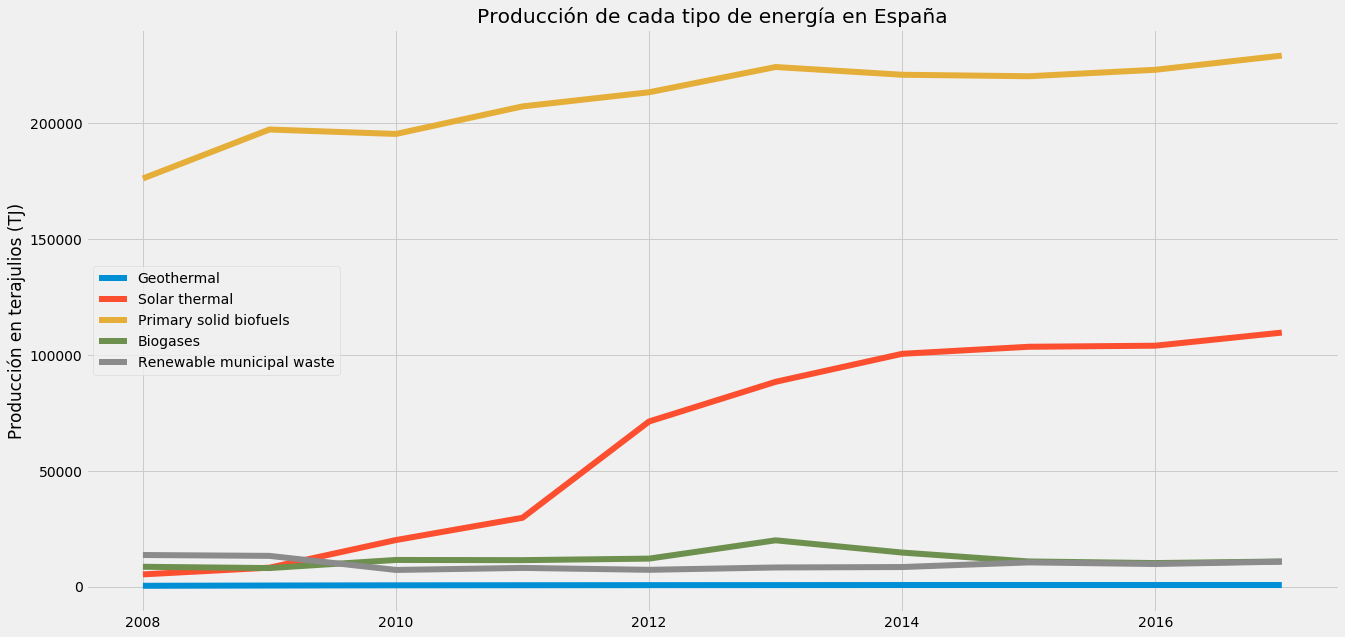

In [95]:
plt.figure(figsize=(20, 10))
plt.title('Producción de cada tipo de energía en España')
plt.ylabel('Producción en terajulios (TJ)')
for df in df_arr:
    plt.plot(df.TIME, df.Value, label=df.SIEC.iloc[0], linewidth=6)
    
plt.legend()

### Como vemos, la energía que más se utiliza en España es la creada por biomasas, como el Pellet, o maderas sobrantes de fábricas. En el caso particular de Jaén, varias empresas acometieron proyectos basados en este tipo de fuente de energía con los huesos sobrantes de aceitunas.

#### Detrás vienen las energías fotovoltaicas, biogases o incluso la combustión de los desperdicios de los vertederos, aunque con mucha menos repercusión. 

##### Al hilo de lo que comentábamos antes, la producción de energía basada en el sol podría aprovecharse muchísimo más debido a la gran cantidad de energía solar de la que España goza. Sin embargo, simplemente no es así.

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# <a name=relacion href=#ini>6. Conclusión</a>

---

#### Concluyendo, en España se utiliza principalmente la energía basada en petróleo y para el transporte. El consumo de energía eléctrica y de gas  ha subido esta pasada década, así como el de las energías renovables. Aun así, falta mucho trabajo que hacer en el ámbito de éstas últimas, por parte no solo de las empresas, sino del gobierno que facilite medidas para ello, en vez de crear impuestos. España es un país que puede beneficiarse sobremanera de este tipo de energía, pero probablemente dar el paso a invertir en ellas es lo que nos echa para atrás.

Fuentes de datos:

> <a href= "https://ec.europa.eu/eurostat/data/database">Eurostat</a>

> <a href= "https://ec.europa.eu/eurostat/databrowser/view/t2020_rd310/default/table?lang=en">Energy Productivity</a>

> <a href= "https://ec.europa.eu/eurostat/databrowser/view/ten00122/default/table?lang=en">Energy Supply</a>

> <a href= "https://ec.europa.eu/eurostat/databrowser/view/ten00124/default/table?lang=en">Energy Consumption</a>

> <a href= "https://ec.europa.eu/eurostat/cache/metadata/en/nrg_ind_ren_esms.htm">Share Renewable Energy</a>

> <a href= "https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=env_air_gge&lang=en">Energy Pollution</a>